In [2]:
import os
import torch
#os.system('jupyter nbconvert --to html presentation.ipynb')

In [6]:
x, y = torch.randn((10,1,5)), torch.randn((10,1,5))


In [27]:
z =torch.hstack((x,y))

In [29]:
m1 = torch.swapaxes(torch.hstack((x,y)), 1, 2)
m2 = torch.swapdims(torch.hstack((x,y)), 1, 2)

In [32]:
torch.equal(m1, z)

False

In [19]:
m1.size()

torch.Size([10, 5, 2])

In [10]:
torch.swapaxes(x , 1,2).size()

torch.Size([10, 5, 1])

In [8]:
torch.concat((x,y), dim=1).size()

torch.Size([10, 2, 5])

In [1]:
# imports
import scipy.io
import numpy as np
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
from tqdm import trange, tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
mat = scipy.io.loadmat('Data_Ankle.mat')
# numpy data
data_np = mat['ankle_data']
# convert to pandas Dataframe
data = pd.DataFrame(mat['ankle_data'])
# add column names
data.columns = ['time','ground-reaction(N)','trunk-angle(rad)','hip-angle(rad)','knee-angle(rad)','ankle-angle(rad)','joint-moment(Nm)']
data.head()


,time,ground-reaction(N),trunk-angle(rad),hip-angle(rad),knee-angle(rad),ankle-angle(rad),joint-moment(Nm)
0,0.00,-10.321381,-0.094286,0.292974,0.825063,-1.492588,-2.011628
1,0.01,-7.990312,-0.096174,0.293179,0.822469,-1.493192,-3.655209
2,0.02,-6.208738,-0.096449,0.294008,0.810997,-1.495867,-5.786433
3,0.03,-5.126637,-0.097196,0.295568,0.785731,-1.501793,-6.190008
4,0.04,-4.774037,-0.095624,0.297472,0.745707,-1.511208,-5.542868


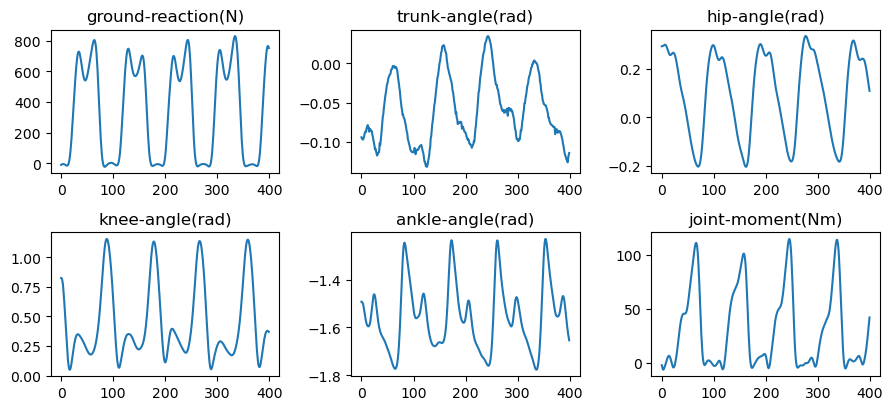

In [16]:
plt.figure(figsize=(9, 6))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.title(data.columns[i+1])
    plt.plot(data_np[:400, i+1])
plt.tight_layout()

In [4]:
#plt.figure()
#sns.pairplot(data=data[:2000])

/tmp/ipykernel_14783/809272572.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


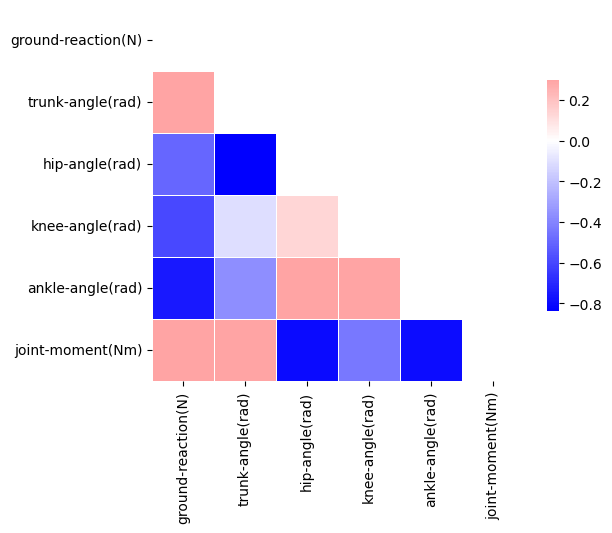

In [3]:
corr = data.loc[:, ~data.columns.isin(['time'])].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(6,6));

sns.heatmap(corr, mask=mask, cmap="bwr", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

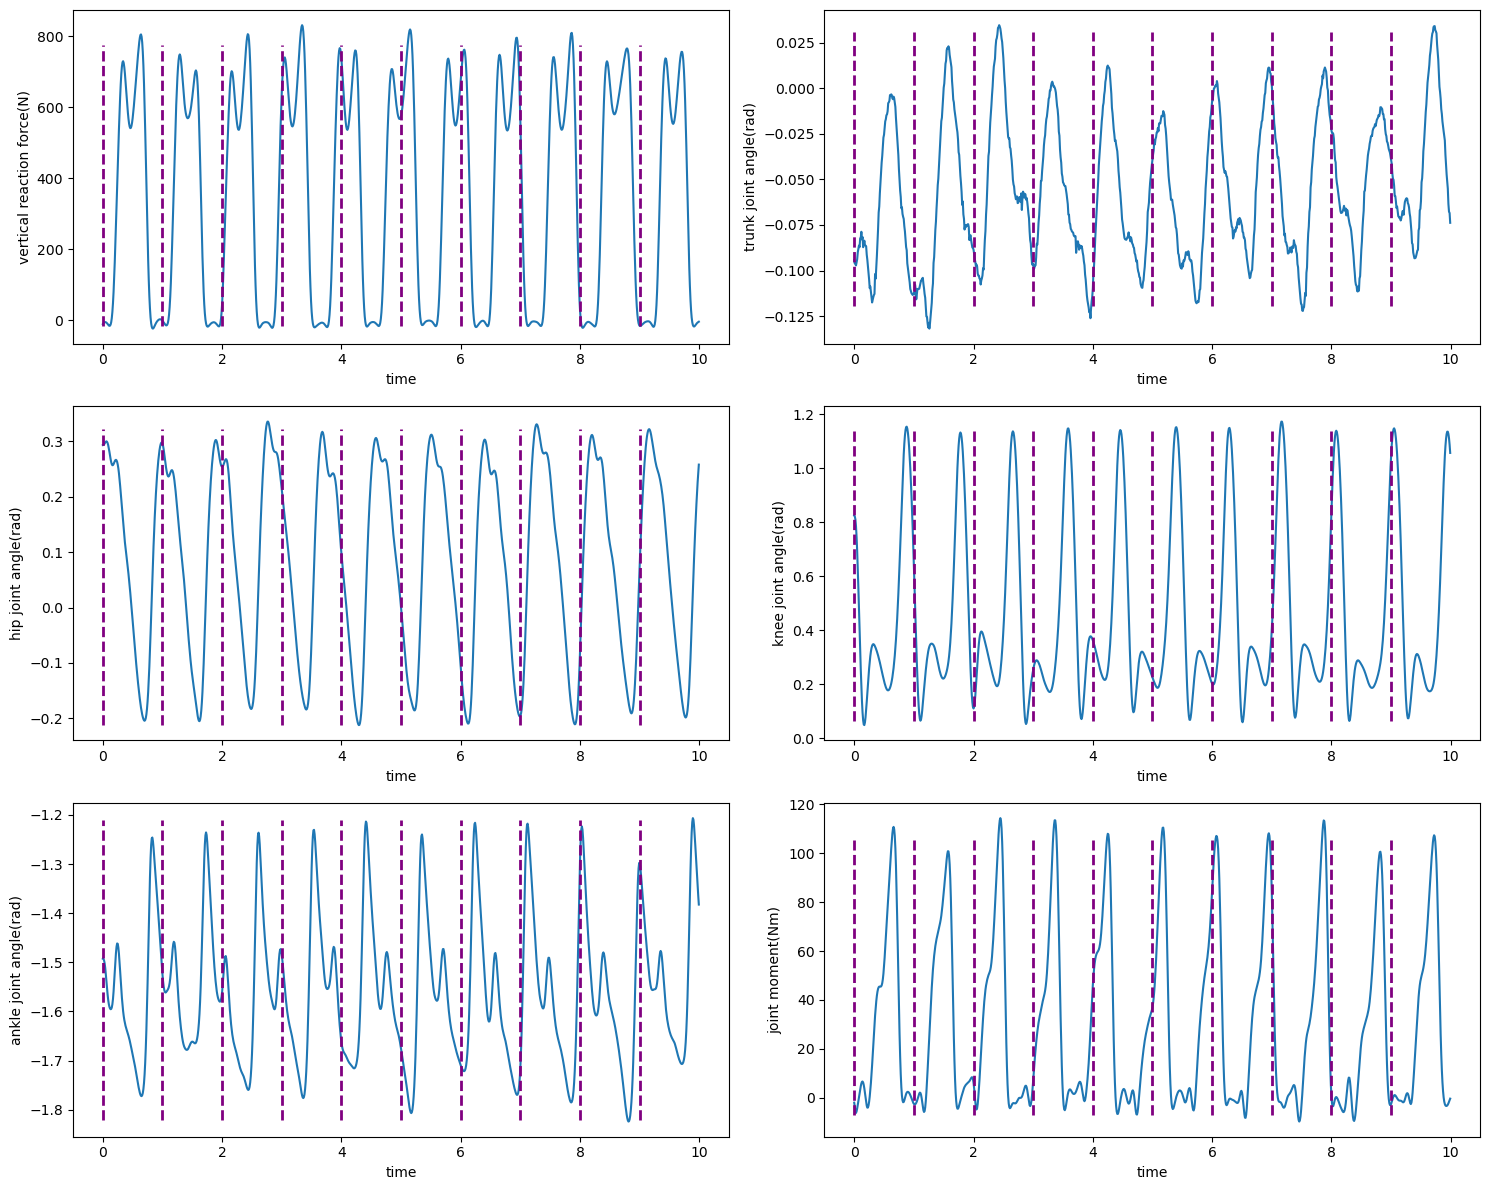

In [128]:
# Plot each feature vs Time
# plot time vs vertical ground reaction force in Newton
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
plt.plot(data_np[:1000,0],data_np[:1000,1])
plt.vlines(x=data_np[:1000:100,0], ymin=np.min(data_np[:1000:10,1]), ymax=np.max(data_np[:1000:10,1]),colors='purple', ls='--', lw=2, label='vline_multiple - full height')
# multiple lines with varying ymin and ymax
plt.xlabel('time')
plt.ylabel('vertical reaction force(N)')
plt.subplot(3,2,2)
plt.plot(data_np[:1000,0],data_np[:1000,2])
plt.vlines(x=data_np[:1000:100,0], ymin=np.min(data_np[:1000:10,2]), ymax=np.max(data_np[:1000:10,2]),colors='purple', ls='--', lw=2, label='vline_multiple - full height')
#sns.scatterplot(x = "time", y = "ground-reaction(N)", data = data.loc[:1000,:], alpha = 0.7,s = 10);
plt.xlabel('time')
plt.ylabel('trunk joint angle(rad)')
plt.subplot(3,2,3)
plt.plot(data_np[:1000,0],data_np[:1000,3])
plt.vlines(x=data_np[:1000:100,0], ymin=np.min(data_np[:1000:10,3]), ymax=np.max(data_np[:1000:10,3]),colors='purple', ls='--', lw=2, label='vline_multiple - full height')
plt.xlabel('time')
plt.ylabel('hip joint angle(rad)')
plt.subplot(3,2,4)
plt.plot(data_np[:1000,0],data_np[:1000,4])
plt.vlines(x=data_np[:1000:100,0], ymin=np.min(data_np[:1000:10,4]), ymax=np.max(data_np[:1000:10,4]),colors='purple', ls='--', lw=2, label='vline_multiple - full height')
plt.xlabel('time')
plt.ylabel('knee joint angle(rad)')
plt.subplot(3,2,5)
plt.plot(data_np[:1000,0],data_np[:1000,5])
plt.vlines(x=data_np[:1000:100,0], ymin=np.min(data_np[:1000:10,5]), ymax=np.max(data_np[:1000:10,5]),colors='purple', ls='--', lw=2, label='vline_multiple - full height')
plt.xlabel('time')
plt.ylabel('ankle joint angle(rad)')
plt.subplot(3,2,6)
plt.plot(data_np[:1000,0],data_np[:1000,6])
plt.vlines(x=data_np[:1000:100,0], ymin=np.min(data_np[:1000:10,6]), ymax=np.max(data_np[:1000:10,6]),colors='purple', ls='--', lw=2, label='vline_multiple - full height')
plt.xlabel('time')
plt.ylabel('joint moment(Nm)')
plt.tight_layout()

we see that the periodicity is almost 1 sec = 100 datapoints

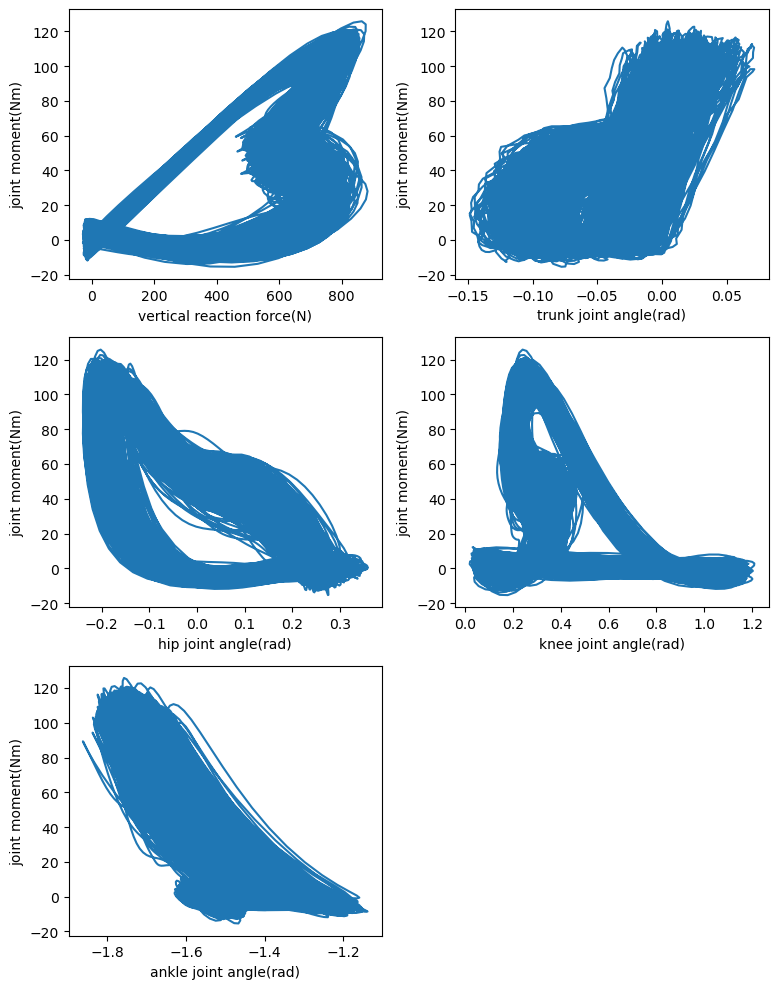

In [8]:
# Plot cross correlation 
plt.figure(figsize=(8,10))
plt.subplot(3,2,1)
plt.plot(data_np[:,1],data_np[:,6])
plt.xlabel('vertical reaction force(N)')
plt.ylabel('joint moment(Nm)')
plt.subplot(3,2,2)
plt.plot(data_np[:,2],data_np[:,6])
plt.xlabel('trunk joint angle(rad)')
plt.ylabel('joint moment(Nm)')
plt.subplot(3,2,3)
plt.plot(data_np[:,3],data_np[:,6])
plt.xlabel('hip joint angle(rad)')
plt.ylabel('joint moment(Nm)')
plt.subplot(3,2,4)
plt.plot(data_np[:,4],data_np[:,6])
plt.xlabel('knee joint angle(rad)')
plt.ylabel('joint moment(Nm)')
plt.subplot(3,2,5)
plt.plot(data_np[:,5],data_np[:,6])
plt.xlabel('ankle joint angle(rad)')
plt.ylabel('joint moment(Nm)')
plt.tight_layout()

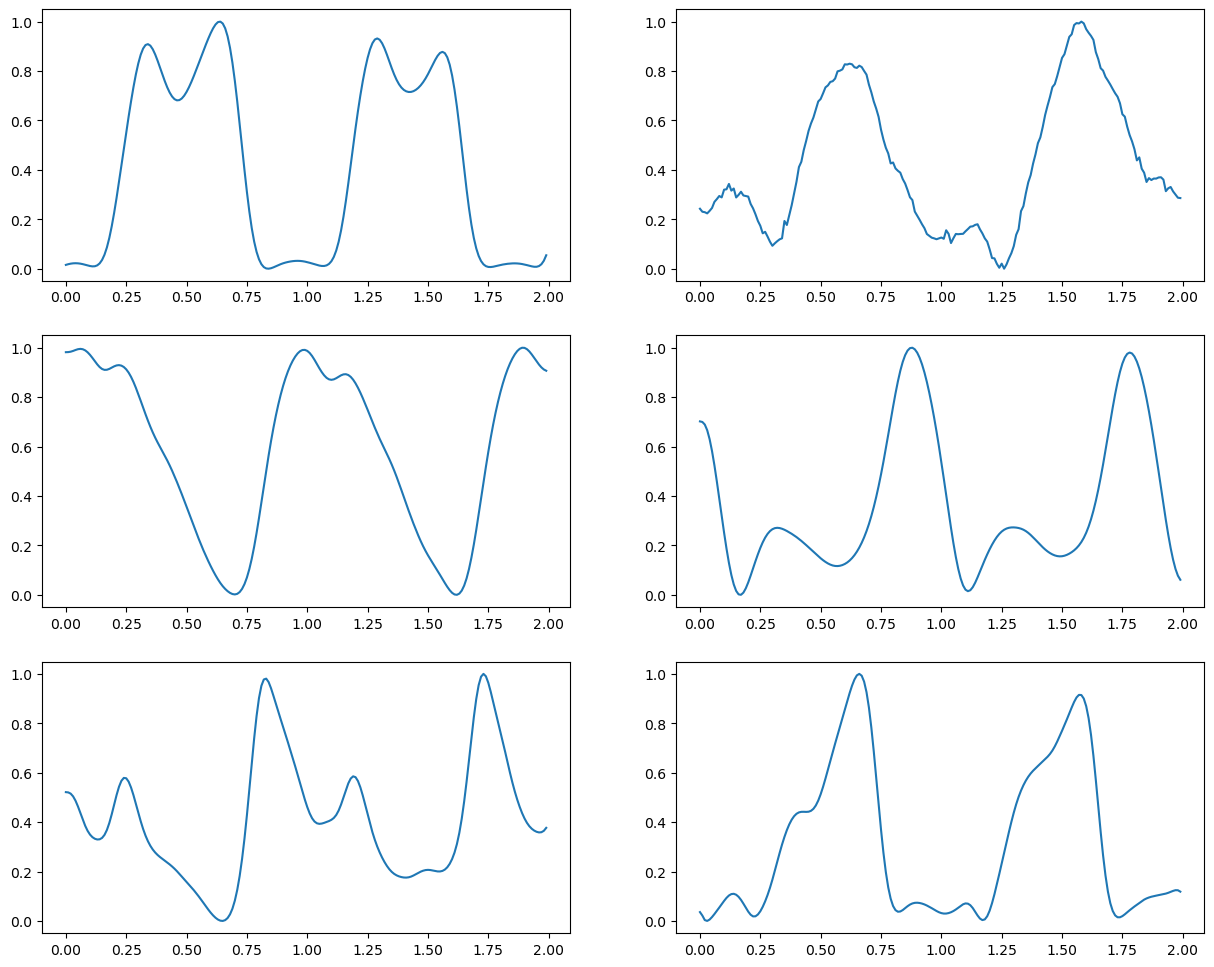

In [133]:
normalizer = lambda arry: (arry-np.min(arry))/(np.max(arry)-np.min(arry))
#normalizer = lambda arry: arry/np.linalg.norm(arry)
slice_id = 200
plt.figure(figsize=(15,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.plot(data_np[:slice_id,0],normalizer(data_np[:slice_id,i+1]))

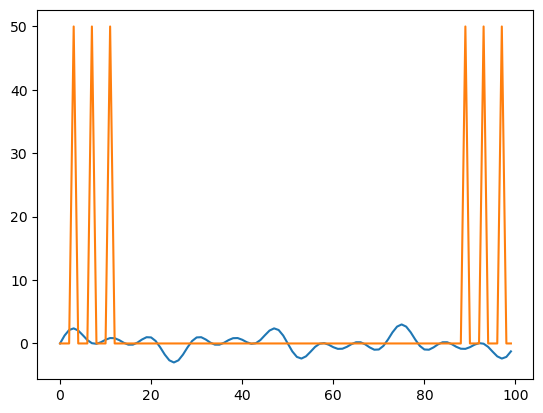

In [104]:
t = np.arange(0,1,0.01)
sig1 = np.sin(2*np.pi*3*t) + np.sin(2*np.pi*11*t) + np.sin(2*np.pi*7*t) 
sig2 = np.cos(2*np.pi*10*t)
plt.plot(sig1)
plt.plot(np.abs(np.fft.fft(sig1)))

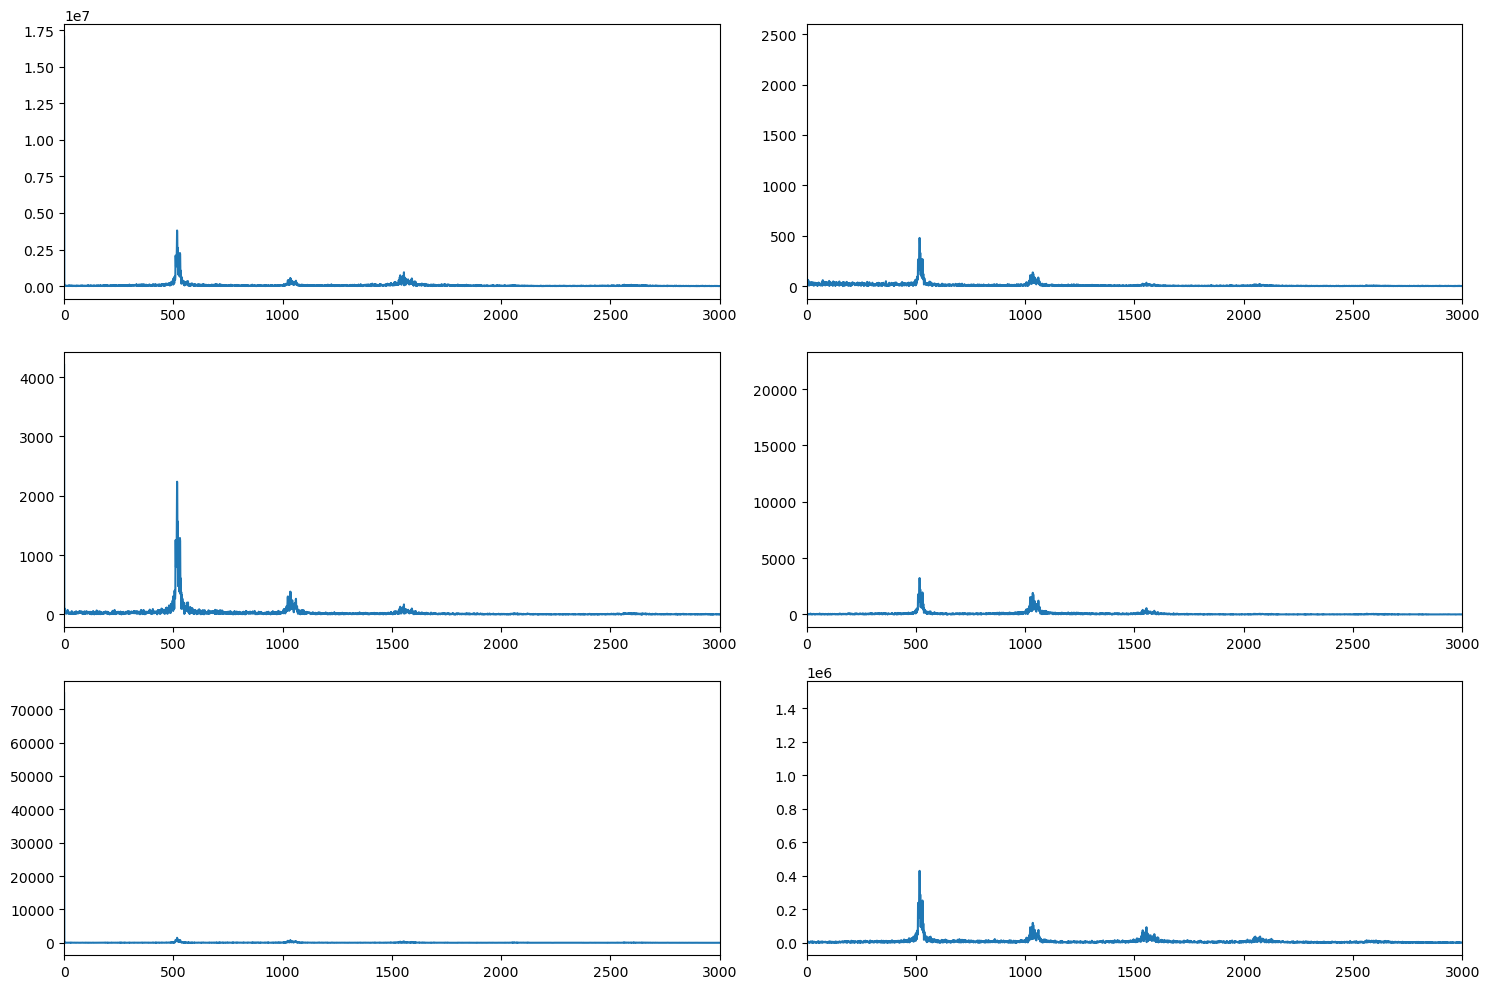

In [6]:
normalizer = lambda arry: arry/np.linalg.norm(arry)
plt.figure(figsize=(15,10))
for i in range(6):
    fff = np.abs(np.fft.fft(data_np[:,i+1]))
    plt.subplot(3,2,i+1)
    #plt.plot(1000*data_np[:,i+1])
    plt.plot(fff)
    plt.xlim([0,3000])
    #plt.ylim([0,250000])
plt.tight_layout()

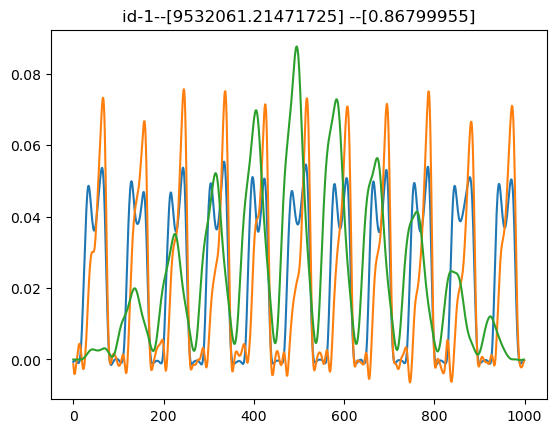

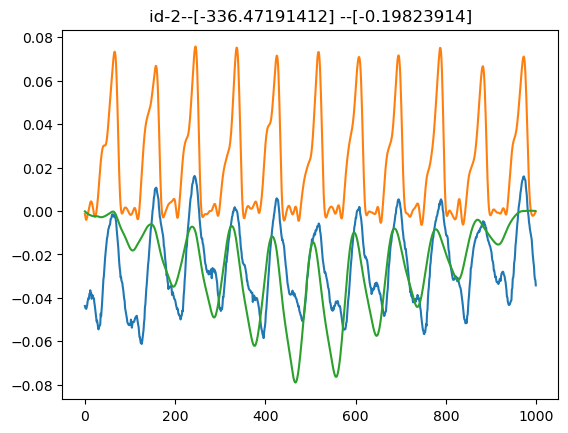

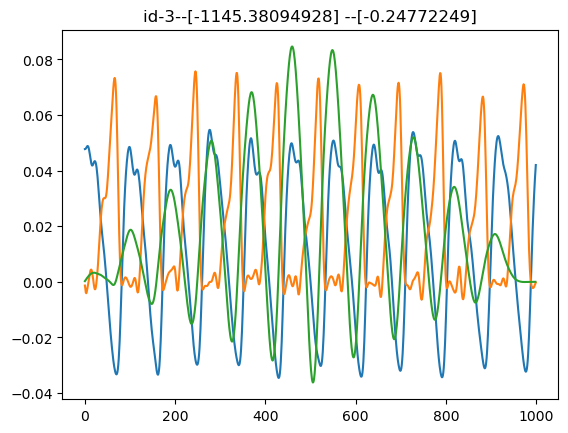

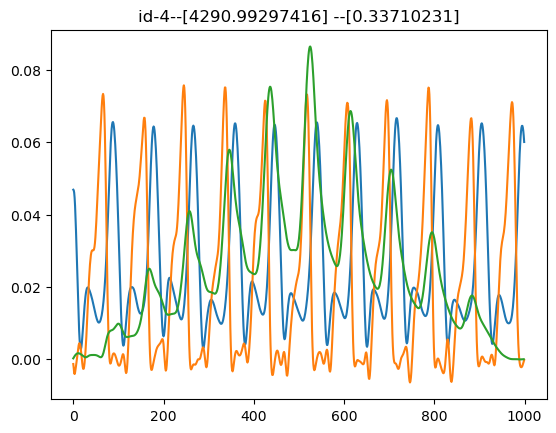

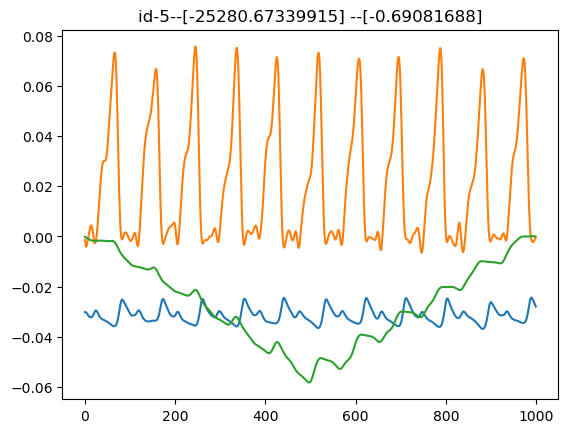

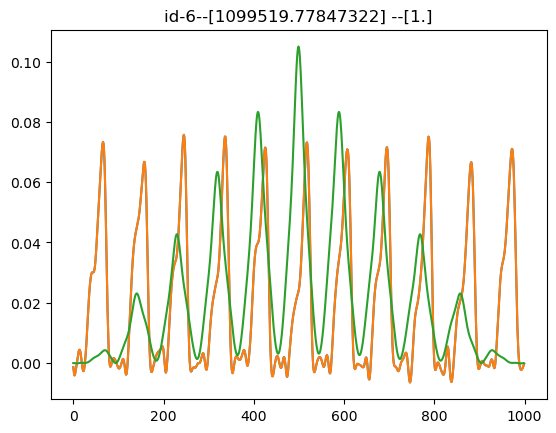

In [7]:
#normalizer = lambda arry: arry/np.linalg.norm(arry)
#normalizer = lambda arry: (arry-np.mean(arry))/np.max(arry)
for i in range(6):
    plt.figure(i)
    plt.title(f'id-{i+1}--{np.correlate(data_np[:500,i+1], data_np[:500,6])} --{np.correlate(normalizer(data_np[:500,i+1]), normalizer(data_np[:500,6]))}')
    plt.plot(normalizer(data_np[:1000,i+1]))
    plt.plot(normalizer(data_np[:1000,6]))
    plt.plot(normalizer(np.correlate(data_np[:500,i+1], data_np[:500,6], mode='full'))) 
    #plt.plot(np.correlate(normalizer(data_np[:500,i+1]), normalizer(data_np[:500,6]), mode='full'))